# Исследование симметрии

### Дана двоичная последовательность длины 'n', состоящая из 0 и 1. 

### Если её изобразить в виде правильного 'n' угольника, то она будет содержать определённое количество осей симметрии (или не содержать).
### Последовательности, которые можно получить друг из друга циклическим сдвигом эквивалентны => образуют один класс эквивалентности. 

### Требуется определить, сколько для заданный 'n' и 'k' (где 'n'-количество элементов в последовательности, а 'k' - количество единиц) существует классов эквивалентности и сколько в каждом классе осей симметрии.

In [3]:
import itertools as it
import numpy
import matplotlib.pyplot as plot

### Генерация последовательности из 0 и 1
"n" - количество элементов в последовательности  
"k" - количество единиц в последовательности

In [4]:
def CreateNumber(num : int, one : int):
    set_of_nums = list()
    for i in range(one):
        set_of_nums.append(1)
    tmp = num-one
    for i in range(tmp):
        set_of_nums.append(0)
    return set_of_nums

### Циклический сдвиг
"list_for_shift" - последовательность элементов  
"num" - количество позиций для сдвига

In [5]:
def CycleShift(list_for_shift:list, num:int):
    lenght=len(list_for_shift)
    num = num % lenght
    num = -num
    new_list=[0]*lenght
    for i in range(lenght):
        if i + num < lenght and i + num >=0:
            new_list[i]=list_for_shift[i + num]
        if i + num >= lenght:
            new_list[i]=list_for_shift[i + num - lenght]
        if i + num <0:
            new_list[i]=list_for_shift[i + num + lenght] 
    return new_list

### Сравнение двух последовательности с циклическим сдивгом на их равенство
"l1" - последовательность  
"l2" - последовательность  
"num" - количество элементов  
"one" - количествво единиц

In [6]:
#В зависимости от того, каких элементов в последовательности меньше, сдвигаю первую последовательность так, 
#чтобы она начиналась с элемента, вхождение которого в последовательность меньше - 'x'.
#Нахожу во второй последовательности первый элемент первой последовательности - 'x' и двигаюсь вправо, 
#сравнивая последовательности поэлементно
#Как только нахожу несоответствие, перепрыгиваю к следующему 'x' и т.д

def CompareShiftLists(l1: list, l2: list, num: int, one: int):
    count = 0
    flag = 0
    l_copy = l1.copy()
    l_copy.reverse()
    if num - one >= num / 2:
        tmp = 1
    else:
        tmp = 0
    for i in l_copy:
        if i != tmp:
            count += 1
        else:
            break
    l1 = CycleShift(l1, count + 1)
    j = 0
    i = 0
    flag = -1
    first_ind = []
    while i != len(l1):
        if j == flag:
            return True
        if l1[i] != l2[j]:
            flag = j
            i = 0
            if j == len(l1):
                j = 0
            while l2[j] != tmp:
                j += 1
                if j == len(l1):
                    j = 0
                if j in first_ind:
                    return False
        if l1[i] == l2[j]:
            if i == 0:
                 if j in first_ind:
                    return False
                 else:
                    first_ind.append(j)
            j += 1
            if j == len(l1):
                j = 0
            i += 1
            if i == len(l1):
                return True    

In [7]:
#Перевод строки в список
def StrToList(string:str, num:int):
    num_list=[]
    for i in range(num):
        num_list.append(int(string[i]))
    return num_list    

### Поиск всех возможных перестановок элементов для заданной последовательности с исключением перестановок, которые возможно получить путём циклического сдвига => Поиск всех классов эквивалентности 
"n" - количество элементов в последовательности  
"k" - количество единиц в последовательности


In [8]:
def Combinations(n: int, k: int):
    comb_list = list()
    comb_list_list=list()
    num_list=list()
    list_of_nums = list()
    list_of_nums = '1' * k + '0' * (n - k)
    for i in it.permutations(list_of_nums, n):
        num = ''.join(i)
        if num not in comb_list:
            comb_list.append(num)
            for j in range(len(comb_list)-1):
                comb_list_list=StrToList(comb_list[j],n)
                num_list=StrToList(num,n)
                if CompareShiftLists(comb_list_list, num_list, n, k):
                    if num in comb_list:
                        comb_list.remove(num)
    return comb_list

## Поиск всех осей симметрии для заданной последовательности (возможны три варианта) - записываются в виде {'ключ':[список осей симметрии]}
### VertexAxis -  {'vertex':[n,m]...}, где n, m - индексы вершин, которые соединяются осью
Оси, проходящие через вершины многоугольника.   
Могут быть только в тому случае, когда количество элементов в последовательности чётное.  
### EdgeAxes -  {'edge':[n,m]...}, где n, m - индексы вершин, после которых следуют рёбра, которые соединяются осью
Оси, проходящие через рёбра многоугольника.     
Могут быть только в тому случае, когда количество элементов в последовательности чётное.  
### VertexEdgeAxis -  {'ver_edge':[n,m]...}, где n - индекс вершины из которой исходит ось, а m - индекс вершины, после которой следует ребро, в которое ось входит
Оси, проходящие через вершину и ребро многоугольника.     
Могут быть только в тому случае, когда количество элементов в последовательности нечётное.  
  
    
      
        
  
  
    
    
Могут быть отрицательные индексы, при этом нумерация идёт с конца 

In [9]:
def VertexAxis(nums:list):
    vert_axes=[]
    exist_list=[]
    length=len(nums)
    index = (length//2)-1
    new_list:list()
    j=1
    for i in range(length):
        j=0
        new_list=CycleShift(nums,i)
        while new_list[index-j] == new_list[index+j]:          
            if j==index:
                axe=index-i
                if axe not in exist_list and length-1-i not in exist_list:
                    vert_axes.append([axe,length-1-i])
                    exist_list.append(axe)
                    exist_list.append(length-1-i)
                break
            j+=1
    return vert_axes
                

In [10]:
def EdgeAxis(nums:list):
    edge_axes=[]
    exist_list=[]
    length=len(nums)
    index = (length//2)-1
    new_list:list()
    j=1
    for i in range(length):
        k=0
        j=1
        new_list=CycleShift(nums,i)
        while new_list[index-k] == new_list[index+j]:
            k=j         
            if j==index+1:
                axe=index-i
                if axe not in exist_list and length-i-1 not in exist_list:
                    edge_axes.append([axe,length-1-i])
                    exist_list.append(axe)
                    exist_list.append((length-1-i))
                break
            j+=1
    return edge_axes

In [11]:
def VertexEdgeAxis(nums:list):
    vert_edge_axes=[]
    length=len(nums)
    index = (int)(length/2)
    new_list:list()
    j=1
    for i in range(length):
        j=0
        new_list=CycleShift(nums,i)
        while new_list[index-j] == new_list[index+j]:           
            if j==index:
                axe=index-i
                vert_edge_axes.append([axe,axe+index])
                break
            j+=1
    return vert_edge_axes                  
    

In [12]:
def FindAllAxis(nums:list):
    tmp=[]
    all_axis = dict()
    length=len(nums)
    if length%2 == 0:
        tmp=VertexAxis(nums)
        if(len(tmp)!=0):
            all_axis['vertex']=tmp
        tmp=EdgeAxis(nums)
        if(len(tmp)!=0):
            all_axis['edge']=tmp
    else:
        tmp=VertexEdgeAxis(nums)
        if(len(tmp)!=0):
            all_axis['ver_edge']=tmp
    return all_axis
        
    

## Отрисовка последовательностей в виде правильных многоугольников с нанесением соответсвующих осей симметрий
"n" - количество элементов  
"num" - последовательность  
"axis" - оси симметрии  
"r" - радиус многоугольника  

In [70]:
def DrawPolygon(n:int, num:list, axis:dict, r:int):
    val_to_move_num= r*0.05
    points=[] 
    tmp=[0,0]
    x=[]
    y=[]
    for i in range(n+1):
        x.append(r * numpy.cos(2 * numpy.pi * i / n))
        y.append(r * numpy.sin(2 * numpy.pi * i / n))
        if i!=n:
            plot.text(x[i]+val_to_move_num, y[i]+val_to_move_num, str(num[i]))
    plot.scatter(x, y, edgecolors = 'black', c = 'black')
    plot.plot(x, y, c='red', linewidth=2)
    plot.title(num)
    for key in axis:
        if(key == 'vertex'):
            draw_axis=axis[key]
            for i in (draw_axis):
                x1_axe= r * numpy.cos(2 * numpy.pi * i[0] / n)
                y1_axe = r * numpy.sin(2 * numpy.pi * i[0] / n)
                x2_axe= r * numpy.cos(2 * numpy.pi * i[1] / n)
                y2_axe = r * numpy.sin(2 * numpy.pi * i[1] / n)
                plot.plot((x1_axe, x2_axe), (y1_axe, y2_axe), '--', color='black', linewidth=1)                
        if(key=='edge'):
            draw_axis=axis[key]
            for i in (draw_axis):
                x1_axe= (r * numpy.cos(2 * numpy.pi * i[0] / n)+ r * numpy.cos(2 * numpy.pi * (i[0]+1) / n))/2
                y1_axe =(r * numpy.sin(2 * numpy.pi * i[0] / n)+ r * numpy.sin(2 * numpy.pi * (i[0]+1) / n))/2
                x2_axe= (r * numpy.cos(2 * numpy.pi * i[1] / n)+ r * numpy.cos(2 * numpy.pi * (i[1]+1) / n))/2
                y2_axe = (r * numpy.sin(2 * numpy.pi * i[1] / n)+ r * numpy.sin(2 * numpy.pi * (i[1]+1) / n))/2
                plot.plot((x1_axe, x2_axe), (y1_axe, y2_axe), '--', color='black', linewidth=1)
        if(key=='ver_edge'):
            draw_axis=axis[key]
            for i in (draw_axis):
                x1_axe= r * numpy.cos(2 * numpy.pi * i[0] / n)
                y1_axe = r * numpy.sin(2 * numpy.pi * i[0] / n)
                x2_axe= (r * numpy.cos(2 * numpy.pi * i[1] / n)+ r * numpy.cos(2 * numpy.pi * (i[1]+1) / n))/2
                y2_axe = (r * numpy.sin(2 * numpy.pi * i[1] / n)+ r * numpy.sin(2 * numpy.pi * (i[1]+1) / n))/2
                plot.plot((x1_axe, x2_axe), (y1_axe, y2_axe), '--', color='black', linewidth=1)
    

### Вычислительный эксперимент
Наглядная демонстрация решения задачи для заданного числа элементов и заданного количества единиц

Enter the count of elements:6
Enter the count of ones:3


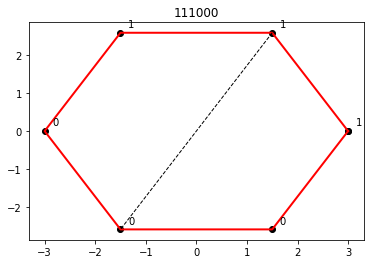

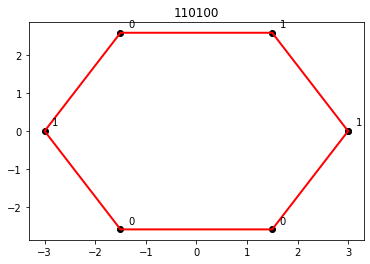

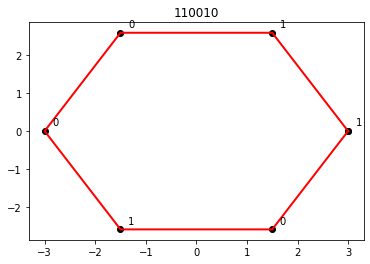

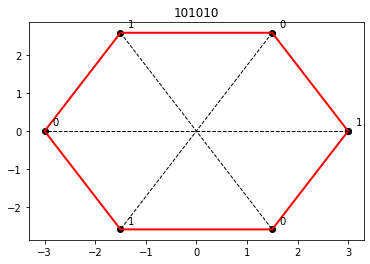

In [71]:
def ComputationalExperiment():
    count=1
    comb:list()
    axis:dict()
    n=int(input("Enter the count of elements:"))
    k=int(input("Enter the count of ones:"))
    comb = Combinations(n,k)
    for i in comb:
        axis = FindAllAxis(i)
        plot.figure(count)
        count+=1
        DrawPolygon(n,i,axis,3)
        
        
    
ComputationalExperiment()

## Поиск всех классов эквивалентности и соответсвующих осей симметрии для всех последовательностей с n = 3...10 и k = 0...n

In [137]:
def PrintFrame(n:int):
    print("--------------------------------------------------------------------------------------")
    print("                             AMOUNT OF ELEMENTS == %d                               "%n)
    print("--------------------------------------------------------------------------------------")

### Вывод осей симметрии
(x) - ось, исходящая из вершины x  
x|y - ось, исходящая из ребра между вершинами x и y

In [126]:
def PrintAxis(eq_class, axes):
    for key,value in axes.items():
        val_len=len(eq_class)
        for elem in value:
            i = elem[0]
            j = elem[1]
            if i<0:
                i=val_len+i
            if j<0:
                j=val_len+j 
            print("\t\t")
            if key == 'ver_edge':
                for k in range(len(eq_class)):
                    if k == 0:
                        print("\t\t", end='')
                    if k == i:
                        print("(%s)"%eq_class[k], end='')
                    elif k == j:
                        print("%s|"%eq_class[k], end='')
                    else:
                        print("%s"%eq_class[k], end='')
                #print("\n")
            elif key == 'vertex':            
                for k in range(len(eq_class)):
                    if k == 0:
                        print("\t\t", end='')
                    if k == i or k==j:
                        print("(%s)"%eq_class[k], end='')
                    else:
                        print("%s"%eq_class[k], end='')
                #print("\n")
            elif key == 'edge':
                for k in range(len(eq_class)):
                    if k == 0:
                        print("\t\t", end='')
                    if k == i or k==j:
                        print("%s|"%eq_class[k], end='')
                    else:
                        print("%s"%eq_class[k], end='')
        print("\n")
        
         

In [141]:
def ExperimentalStatistics():
    axes=[]
    axes_count=0
    list_of_axes = []
    for i in range(3,10+1):
        PrintFrame(i)
        #print("N = %d:"%i, end='')
        for k in range(0,i+1):
            print("___k___ = %d:"%(k),end='')
            comb=Combinations(i,k)
            print("\tNumber of equivalence classes = %d"%len(comb))
            for eq_class in comb:
                axes=FindAllAxis(eq_class)
                axes_count=0
                for key,value in axes.items():
                    axes_count+=len(value)
                print("\t\t%d axes of symmetry:"%axes_count)
                PrintAxis(eq_class,axes)
                
        print("\n")        
        

ExperimentalStatistics() 

--------------------------------------------------------------------------------------
                             AMOUNT OF ELEMENTS == 3                               
--------------------------------------------------------------------------------------
___k___ = 0:	Number of equivalence classes = 1
		3 axes of symmetry:
		
		0(0)0|		
		(0)0|0		
		0|0(0)

___k___ = 1:	Number of equivalence classes = 1
		1 axes of symmetry:
		
		(1)0|0

___k___ = 2:	Number of equivalence classes = 1
		1 axes of symmetry:
		
		1|1(0)

___k___ = 3:	Number of equivalence classes = 1
		3 axes of symmetry:
		
		1(1)1|		
		(1)1|1		
		1|1(1)



--------------------------------------------------------------------------------------
                             AMOUNT OF ELEMENTS == 4                               
--------------------------------------------------------------------------------------
___k___ = 0:	Number of equivalence classes = 1
		4 axes of symmetry:
		
		0(0)0(0)		
		(0)0(0)0

		
		00|00|		

___k___ = 3:	Number of equivalence classes = 11
		1 axes of symmetry:
		
		1(1)1000|000

		0 axes of symmetry:
		0 axes of symmetry:
		1 axes of symmetry:
		
		1|1000(1)000

		0 axes of symmetry:
		0 axes of symmetry:
		1 axes of symmetry:
		
		10(1)0100|00

		0 axes of symmetry:
		0 axes of symmetry:
		3 axes of symmetry:
		
		100(1)0010|0		
		(1)0010|0100		
		10|0100(1)00

		1 axes of symmetry:
		
		1000(1)0001|

___k___ = 4:	Number of equivalence classes = 16
		1 axes of symmetry:
		
		11|1100(0)00

		0 axes of symmetry:
		0 axes of symmetry:
		0 axes of symmetry:
		0 axes of symmetry:
		1 axes of symmetry:
		
		11(0)1100|00

		0 axes of symmetry:
		0 axes of symmetry:
		1 axes of symmetry:
		
		1|1010(0)010

		1 axes of symmetry:
		
		110|0110(0)0

		1 axes of symmetry:
		
		1|1001(0)100

		0 axes of symmetry:
		0 axes of symmetry:
		0 axes of symmetry:
		1 axes of symmetry:
		
		101(0)1010|0

		0 axes of symmetry:
___k___ = 5:	Number of equivalence classes = 14
		1 axes of symmetr